# Dragon Raja: Examining Dragon Raja Treasure of Times Drop Rate (Part 3) 

From the previous part, we calculated approximation for both all fashion items and each specific part (hair and outfits). It's now the time to use these informations to help in our decisions.

<img src="https://scontent.fbkk5-4.fna.fbcdn.net/v/t1.15752-9/287655536_5265152206907052_6723932089437984476_n.png?_nc_cat=110&ccb=1-7&_nc_sid=ae9488&_nc_eui2=AeFTQEmgBpVKPANYx8JunB3WLsVf4R2zNBYuxV_hHbM0FmYnxxXhh7-Qg1AwKZ7YM7bI6ox9Xxw3a2hhPLXl9nh-&_nc_ohc=c-zorJAiZzAAX-M4ZJK&_nc_ht=scontent.fbkk5-4.fna&oh=03_AVKOPmEBXRruPN0tsp6avsNcDRMZ3rt_fWzLl3uovc8Bow&oe=62FEF575" width="700">

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Objectives
We have two main questions to answer for this part:
1. How much coupon do we need to ensure our chance of getting outfit/hairs?
2. Is Treasure of Time really the best investment for fashion items in this game?

### Q1: How many coupons do we need for this?

As we have the rates for each category of item, it's now easier for us. For this question, we will simulate the <b>Negative Binomial Distribution</b> which represents the chance of getting specific numbers of success for each number of trials at specific rate. In this case, we set number of success to 1 fashion item/hair/outfit depend on our choice and use the rates according to our choice. (1% / 0.4% / 0.4%)

In [83]:
# Simulating negative binomial distribution with specific rates
nb_all = np.random.negative_binomial(1,0.01,10000)
nb_hair = np.random.negative_binomial(1,0.006,10000)
nb_outfit = np.random.negative_binomial(1,0.004,10000)

Text(0.5, 1.0, 'Number of Draws to get at least 1 Success')

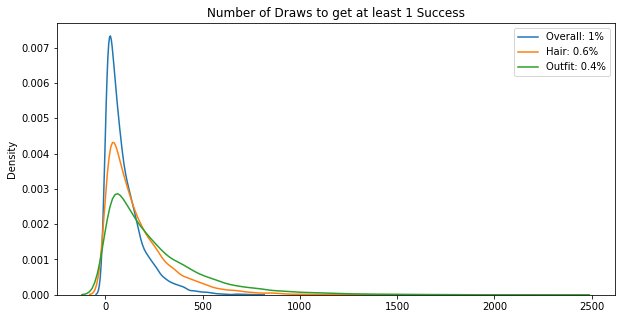

In [85]:
plt.figure(figsize=(10,5))
sns.kdeplot(nb_all)
sns.kdeplot(nb_hair)
sns.kdeplot(nb_outfit)
plt.legend(['Overall: 1%','Hair: 0.6%','Outfit: 0.4%'])
plt.title('Number of Draws to get at least 1 Success')

The graph shows the distribution of numbers of draws to get at least one item in our interest. However, it looks really hard to understand, let's simplify it into detailed informations.

In [86]:
draws = [10,20,30,50,100,150,200,300,400,500,600,750,1000]
[agg,outfit,hair,both] = [[] for i in range(4)]

for n in draws:
    agg.append(np.sum(nb_all <= n) / 100)
    outfit.append(np.sum(nb_outfit <= n)/ 100)
    hair.append(np.sum(nb_hair <= n)/ 100)       

In [87]:
result = pd.DataFrame()

result['Draws'] = draws
result['Draws'] = result['Draws'].astype('str')
result['Overall'] = agg
result['Outfit'] = outfit
result['Hair'] = hair

result.head()

,Draws,Overall,Outfit,Hair
0,10,10.37,4.84,6.90
1,20,18.92,8.49,12.17
2,30,26.90,12.34,17.34
3,50,40.36,19.09,26.72
4,100,63.13,33.06,45.32


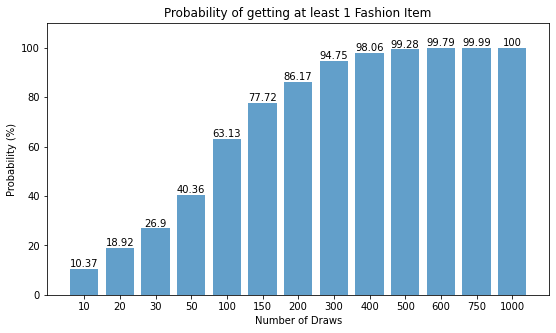

In [88]:
plt.figure(figsize=(9,5))

plot = plt.bar(result['Draws'],result['Overall'],alpha=0.7)
plt.bar_label(plot) 

plt.title('Probability of getting at least 1 Fashion Item')
plt.xlabel('Number of Draws')
plt.ylabel('Probability (%)')
plt.ylim(0,110) # Give more space for annotation
plt.show()

From the plot, we can see that 100 draws can only ensure the chance of getting at least a fashion item by 63%. Meanwhile, the chance of getting at least a fashion item in 10 draws is only around 10%. Consider yourself lucky if you get a hair from only ten yolo draws!

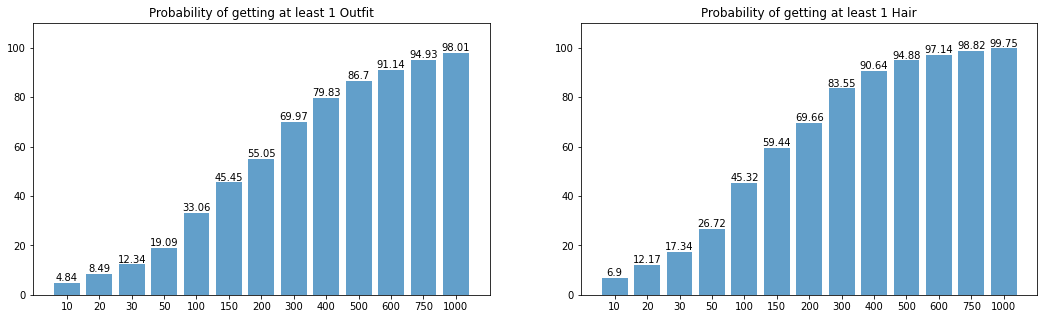

In [89]:
fig,ax = plt.subplots(1,2,figsize=(18,5))
plt.setp(ax, ylim=(0,110))

p1 = ax[0].bar(result['Draws'],result['Outfit'],alpha=0.7)
p2 = ax[1].bar(result['Draws'],result['Hair'],alpha=0.7)

ax[0].set_title('Probability of getting at least 1 Outfit')
ax[1].set_title('Probability of getting at least 1 Hair')

ax[0].bar_label(p1)
ax[1].bar_label(p2)

plt.show()

From the visual, we can see that you only have 70% chance of getting at least 1 outfit from 300 draws. 300 is a really large number for a lot of players in the server. So if you want to get an outfit, do remember that there's a 30% chance of not getting one. While on hair side, the rate seems to be more pleasant. However, 100 draws for a hair is like a coin toss as you only have around 50% of getting a hair within first 100 draws.

One important note, <b>the distribution we simulated consider results other than item in interest as failed attempts.</b> For example, the outfit visual considers hair draws as a failed attempt and do not account it in successing.

### Q2: Is Treasure of Time really the best investment in the game?

When you ask DRSEA players what should you use coupons on, people usually recommend them to invest on Treasure of Times. But is it really the best idea in term of efficiency and worthiness? Let's find out

Almost all fashion sets in Treasure of Times come as a rerun. In the recent generations, Treasure of Times tend to rerun outfit that were in normal gacha before. This means we have two choice if we do not matter time factor; Invest in gacha or in Treasure of Times.

Normal gacha costs 50 coupons per draw but guarantee an outfit if you roll 408 times or more. This means it would take 20400 coupons to guarantee an outfit in normal gacha. Likewise, you can roll 680 Treasure of Times but with no guarantee that the outfit will come.

To evaluate between 2 decisions, we need to create a threshold. We will set up " Theoretical Rate " which is a rate that makes expected outcome equal. If theoretical rate and observed rate is close enough, we might say that both decisions yields similar outcome. 

Assuming we can accept 5% failure by random chance, we develop following formula for theoretical rate:

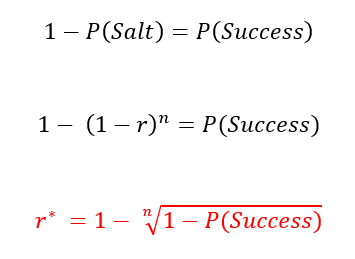

In [78]:
# Define function to calculate theo. rate
def theo_rate(n,success_rate=0.95):
    r = 1 - np.power(1-success_rate,1/n)
    return r

In [82]:
r_theo = theo_rate(680)
print('Theoretical Rate: {:.4f}%'.format(r_theo*100))

Theoretical Rate: 0.4396%


At 5% error acceptance, the theoretical rate is around 0.44% which is somehow close to 0.4%. If your target is to get at least 1 outfit and call it a day, both choices might not differ much. However, we may need to consider other items that might come during the draws in both regimes such as hair or other upgrding materials.

One problem making decision harder is I lack the data to compute for droprates in normal gacha (and it's hard to collect data as it is not popular choice as Treasure of Times). However, from my experience, players who invest on both tend to agree that ToT rates is far higher than normal ones. 

With all the informations I have, I suggest that waiting for outfits to rerun in Treasure of Times might be a better idea. Sacrifing little outfit rate for chances to get hair which have more pleasant rates compared to normal gacha counterpart would make it worth.

I hope my analysis be useful for DRSEA players in making decisions toward Treasure of Times, good luck on your draws!